<a href="https://colab.research.google.com/github/yunjinchoidev/coding-test-study/blob/main/230425_%EC%95%A0%EC%A0%80%ED%86%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 설치**

In [ ]:
!pip install openai          # OpenAI와 상호작용에 사용
!pip install langchain     # 자연어 처리에 사용
!pip install tiktoken        # 텍스트 토큰화에 사용
!pip install googletrans==4.0.0-rc1  # 번역에 사용
!pip install python-docx  # 보고서 생성에 사용

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 8.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.7/636.7 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2

# **2. 기능 구현**

## **2-1. 논문 검색 (semantic scholar)**
> https://www.semanticscholar.org/product/api  
> https://api.semanticscholar.org/api-docs/graph#tag/Paper-Data/operation/get_graph_get_paper_search

In [ ]:
# example: transformer,language,deep,learning

import requests

keywords = "chatgpt"         # 검색 키워드 (쉼표로 분리)
limit = 3                              # 한 페이지에 보일 논문 수
offset = 0                            # 페이지 번호
fields = "title,journal,year"  # 추출 데이터

# 논문 데이터 추출
query = f"https://api.semanticscholar.org/graph/v1/paper/search?query={keywords}&limit={limit}&offset={offset}&fields={fields}"
s = requests.get(query)

# 검색 결과
s_json = s.json()
s_json

{'total': 1992,
 'offset': 0,
 'next': 3,
 'data': [{'paperId': 'cf1f26e7cbed3958b3c2870656568c299fece6e3',
   'title': 'Performance of ChatGPT on USMLE: Potential for AI-assisted medical education using large language models',
   'year': 2022,
   'journal': {'name': 'PLOS Digital Health', 'volume': '2'}},
  {'paperId': '7eb094b63ecd57b530a9ccfbfd96287a510b9c7f',
   'title': '"I think this is the most disruptive technology": Exploring Sentiments of ChatGPT Early Adopters using Twitter Data',
   'year': 2022,
   'journal': {'name': 'ArXiv', 'volume': 'abs/2212.05856'}},
  {'paperId': '23cae400cfd1a7c455c721256b838e98a307d5e6',
   'title': 'ChatGPT Makes Medicine Easy to Swallow: An Exploratory Case Study on Simplified Radiology Reports',
   'year': 2022,
   'journal': {'name': 'ArXiv', 'volume': 'abs/2212.14882'}}]}

In [ ]:
import itertools

keywords = "deep+learning"       # 검색 키워드 (+로 분리)
limit = 100                                                # 한 페이지에 보일 논문 수
offset = 0                                                  # 페이지 번호
fields = "title,url,journal,year,abstract"          # 추출 데이터

data_papers = []                 # 데이터 수집 리스트

# 페이지를 넘겨가며 검색
while True:
    # 논문 검색
    query = f"https://api.semanticscholar.org/graph/v1/paper/search?query={keywords}&limit={limit}&offset={offset}&fields={fields}"
    s = requests.get(query)
    s_json = s.json()

    # 검색이 더이상 안되면 반복 중지
    if not s_json.get("data"):
        data_papers = list(itertools.chain(*data_papers))  # 2중 리스트를 단일 리스트로 변환환
        break

    # 검색이 되었다면 리스트에 추가
    data_papers.append(s_json["data"])
    offset += limit

In [ ]:
# 수집 논문 총 수
print(len(data_papers))

# 수집 논문 확인
data_papers[:3]

2500


[{'paperId': '3c8a456509e6c0805354bd40a35e3f2dbf8069b1',
  'url': 'https://www.semanticscholar.org/paper/3c8a456509e6c0805354bd40a35e3f2dbf8069b1',
  'title': 'PyTorch: An Imperative Style, High-Performance Deep Learning Library',
  'abstract': 'Deep learning frameworks have often focused on either usability or speed, but not both. PyTorch is a machine learning library that shows that these two goals are in fact compatible: it was designed from first principles to support an imperative and Pythonic programming style that supports code as a model, makes debugging easy and is consistent with other popular scientific computing libraries, while remaining efficient and supporting hardware accelerators such as GPUs. In this paper, we detail the principles that drove the implementation of PyTorch and how they are reflected in its architecture. We emphasize that every aspect of PyTorch is a regular Python program under the full control of its user. We also explain how the careful and pragmatic

In [ ]:
# pandas DataFrame으로 변환

import pandas as pd

# 데이터 추출
titles, years, urls = [], [], []
journals, volumes, pages, abstracts = [], [], [], []
for data_paper in data_papers:
    titles.append(data_paper["title"])
    years.append(data_paper["year"])
    urls.append(data_paper["url"])
    abstracts.append(data_paper["abstract"])

    if data_paper.get("journal"):
        journals.append(data_paper["journal"].get("name"))
        volumes.append(data_paper["journal"].get("volume"))
        pages.append(data_paper["journal"].get("pages"))
    else:
        journals.append(None)
        volumes.append(None)
        pages.append(None)

# DataFrame 작성
df_papers = pd.DataFrame({"title":titles, "years":years, "urls":urls, "journals":journals, "volumes":volumes, "pages":pages, "abstracts":abstracts})
print(df_papers.shape)
df_papers.info()

(2500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      2500 non-null   object 
 1   years      2499 non-null   float64
 2   urls       2500 non-null   object 
 3   journals   2166 non-null   object 
 4   volumes    1661 non-null   object 
 5   pages      1649 non-null   object 
 6   abstracts  2043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 136.8+ KB


### 논문 출판 동향 (Matplotlib)

In [ ]:
# 결측치 제거 : 년도
df_papers = df_papers.dropna(subset=["years"])
print(df_papers.shape)

# data type 변환 (float -> integer)
df_papers["years"] = df_papers["years"].astype(int)

# 년도별 정렬
df_papers = df_papers.sort_values("years", ascending=False)
df_papers

(2499, 7)


<ipython-input-17-bb988022fffb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_papers["years"] = df_papers["years"].astype(int)


,title,years,urls,journals,volumes,pages,abstracts
144,Deep Learning,2022,https://www.semanticscholar.org/paper/5aba41b4...,None,None,None,None
1133,IEEE Transactions on Pattern Analysis and Mach...,2022,https://www.semanticscholar.org/paper/d8ed6678...,IEEE Transactions on Pattern Analysis and Mach...,None,None,"In the real world, a realistic setting for com..."
1739,Deep learning in optical metrology: a review,2022,https://www.semanticscholar.org/paper/916455d9...,"Light, Science & Applications",11,None,None
1602,Deep learning in optical metrology: a review,2022,https://www.semanticscholar.org/paper/916455d9...,"Light, Science & Applications",11,None,None
2324,Deep Learning for Computer Vision: A Brief Review,2022,https://www.semanticscholar.org/paper/cf48e287...,International Journal of Advanced Research in ...,None,None,Over the last years deep learning methods have...
...,...,...,...,...,...,...,...
1875,"Collaborative Learning and the ""Conversation o...",1984,https://www.semanticscholar.org/paper/2b7fe5f3...,College English,46,635,eighth or ninth on a list of ten items. Last y...
988,"The Relationship between Learning Conception, ...",1984,https://www.semanticscholar.org/paper/7a6d31b2...,British Journal of Educational Psychology,54,73-83,Summary. The essential point of the present st...
900,ON QUALITATIVE DIFFERENCES IN LEARNING: I—OUTC...,1976,https://www.semanticscholar.org/paper/905c3604...,British Journal of Educational Psychology,46,4-11,Summary. This paper describes an attempt to id...
1076,Depth of processing and the retention of words,1975,https://www.semanticscholar.org/paper/9c07b365...,,,None,SUMMARY Ten experiments were designed to explo...


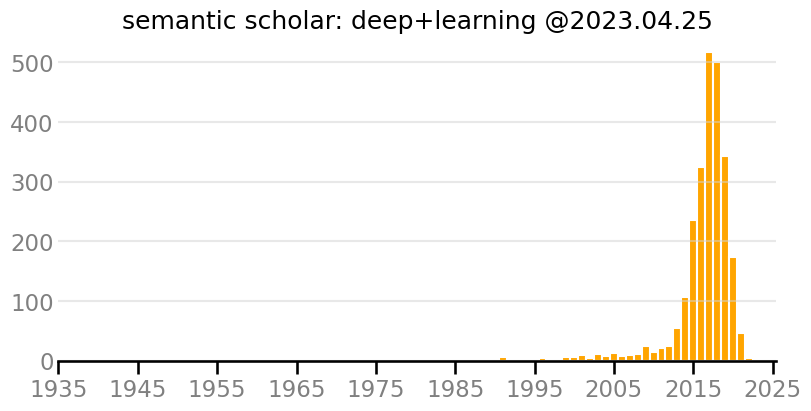

In [ ]:
# Visualization

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

# 데이터 정리
df_papers_years = df_papers["years"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
ax.bar(df_papers_years.index, df_papers_years, width=1, fc="orange", ec="w")
ax.set_xticks(range(1935, 2035, 10))
ax.set_title(f"semantic scholar: {keywords} @{datetime.strftime(datetime.now(), '%Y.%m.%d')}")
ax.tick_params(axis="x", rotation=0, labelcolor="gray")
ax.tick_params(axis="y", length=0, labelcolor="gray")
ax.grid(axis="y", c="lightgray", alpha=0.5)
ax.spines[["left", "top", "right"]].set_visible(False)

In [ ]:
df_papers.query("years == 2000")

,title,years,urls,journals,volumes,pages,abstracts
899,What Do New Views of Knowledge and Thinking Ha...,2000,https://www.semanticscholar.org/paper/24324692...,Educational Researcher,29,15 - 4,The education and research communities are abu...
1767,Learnability in Optimality Theory,2000,https://www.semanticscholar.org/paper/bc2d6236...,Linguistic Inquiry,29,229-268,In this article we show how Optimality Theory ...
2371,"Transfer of Learning: Cognition, Instruction, ...",2000,https://www.semanticscholar.org/paper/16b92e0a...,,,None,Foreword. Introduction. I. What Transfer of Le...
1657,Promoting deep learning through teaching and a...,2000,https://www.semanticscholar.org/paper/b1a899a3...,,,None,This part of the conference concerns ‘knowledg...
922,Learning in Science: A Comparison of Deep and ...,2000,https://www.semanticscholar.org/paper/d3c37c95...,Journal of Research in Science Teaching,37,109-138,The purpose of this study was to explore in gr...
1557,"Students' Conceptions of Learning, the Classro...",2000,https://www.semanticscholar.org/paper/2696fef2...,The Journal of Educational Research,93,262 - 270,Abstract A model that hypothesized relationshi...


## **2-2. 초록 요약, 질의 응답 (langchain)**

> https://aifactory.space/learning/2359/discussion/243 : 랭체인1부 (김태영)



In [ ]:
from langchain.llms import OpenAI
from MyAPIKEY import OpenAI as openaikey
import openai
import os
os.environ["OPENAI_API_KEY"] = openaikey

llm = OpenAI(temperature=0.9)
text = "인공지능팩토리 플랫폼은 인공지능을 위한 ?SNS이야. 이 플랫폼을 소개하기 위한 문구를 작성해"
print(llm(text))

보자.

인공지능 팩토리 플랫폼은 인공지능 중심의 소셜 네트워크 서비스로, 사용자를 위해 다양한 인공지능과 관련한 상식과 개념, 기술개발 방법론 등 다양한 교과목을 제공합니다. 사용자는 인공지능 개발에 필요


In [ ]:
# 초록 결측치 제거

df_paper_abstract = df_papers.dropna(subset=["abstracts"]).reset_index()
print(df_paper_abstract.shape)
df_paper_abstract.loc[:3]

(2042, 8)


,index,title,years,urls,journals,volumes,pages,abstracts
0,1133,IEEE Transactions on Pattern Analysis and Mach...,2022,https://www.semanticscholar.org/paper/d8ed6678...,IEEE Transactions on Pattern Analysis and Mach...,None,None,"In the real world, a realistic setting for com..."
1,2324,Deep Learning for Computer Vision: A Brief Review,2022,https://www.semanticscholar.org/paper/cf48e287...,International Journal of Advanced Research in ...,None,None,Over the last years deep learning methods have...
2,2354,Prediction of Heart Disease Using a Combinatio...,2021,https://www.semanticscholar.org/paper/31cf4c96...,Computational Intelligence and Neuroscience,2021,None,The correct prediction of heart disease can pr...
3,2359,A review of medical image data augmentation te...,2021,https://www.semanticscholar.org/paper/5c107f5a...,Journal of Medical Imaging and Radiation Oncology,65,None,Research in artificial intelligence for radiol...


In [ ]:
abstract = df_paper_abstract.loc[0, "abstracts"]
abstract

'In the real world, a realistic setting for computer vision or multimedia recognition problems is that we have some classes containing lots of training data and many classes contain a small amount of training data. Therefore, how to use frequent classes to help learning rare classes for which it is harder to collect the training data is an open question. Learning with Shared Information is an emerging topic in machine learning, computer vision and multimedia analysis. There are different level of components that can be shared during concept modeling and machine learning stages, such as sharing generic object parts, sharing attributes, sharing transformations, sharing regularization parameters and sharing training examples, etc. Regarding the specific methods, multi-task learning, transfer learning and deep learning can be seen as using different strategies to share information. These learning with shared information methods are very effective in solving real-world large-scale problems.

In [ ]:
# 단락을 입력받으면 요약하는 체인

from langchain import OpenAI
from langchain.chains.summarize import load_summarize_chain

llm = OpenAI(temperature=0.0)
summary_chain = load_summarize_chain(llm, chain_type="map_reduce")

from langchain.chains import AnalyzeDocumentChain
summarize_document_chain = AnalyzeDocumentChain(combine_docs_chain=summary_chain)

summary = summarize_document_chain.run(abstract)
summary

' This special issue seeks to explore recent developments in learning with shared information methods and their applications in computer vision and multimedia analysis. Topics of interest include multi-task learning, transfer learning, deep learning, multi-modal approaches, and different sharing strategies. Real-world applications such as event detection, object recognition, object detection, action recognition, and human head pose estimation are encouraged, as well as new datasets and metrics to evaluate the benefit of the proposed sharing ability.'

In [ ]:
# 질의응답체인

from langchain.chains.question_answering import load_qa_chain

qa_chain = load_qa_chain(llm, chain_type="map_reduce")
qa_document_chain = AnalyzeDocumentChain(combine_docs_chain=qa_chain)

# 방법론
methodology = qa_document_chain.run(input_document=abstract, question="what is the methodology in this article?")
methodology

' The methodology in this article is using different strategies to share information, such as multi-task learning, transfer learning and deep learning.'

In [ ]:
# 메인 메시지
message = qa_document_chain.run(input_document=abstract, question="what is the main message in this article?")
message

' The main message of this article is to encourage the submission of state-of-the-art works and literature reviews related to learning with shared information methods and their applications in computer vision and multimedia analysis.'

###  일괄 초록 요약, 질의 응답 (pd.Series.apply)

In [ ]:
# 20편 한정

df_paper_abstract20 = df_paper_abstract.iloc[:20]

In [ ]:
%%time

df_paper_abstract20["methodology"] = df_paper_abstract20["abstracts"].apply(lambda x: qa_document_chain.run(input_document=x, question="what is the methodology in this article?"))
df_paper_abstract20["message"] = df_paper_abstract20["abstracts"].apply(lambda x: qa_document_chain.run(input_document=x, question="what is the main message in this article?"))
df_paper_abstract20

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 2.94 s, sys: 288 ms, total: 3.23 s
Wall time: 5min 54s


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,title,years,urls,journals,volumes,pages,abstracts,methodology,message
0,1133,IEEE Transactions on Pattern Analysis and Mach...,2022,https://www.semanticscholar.org/paper/d8ed6678...,IEEE Transactions on Pattern Analysis and Mach...,None,None,"In the real world, a realistic setting for com...",The methodology in this article is using diff...,The main message of this article is to encour...
1,2324,Deep Learning for Computer Vision: A Brief Review,2022,https://www.semanticscholar.org/paper/cf48e287...,International Journal of Advanced Research in ...,None,None,Over the last years deep learning methods have...,This article provides a review of deep learni...,The main message in this article is that it p...
2,2354,Prediction of Heart Disease Using a Combinatio...,2021,https://www.semanticscholar.org/paper/31cf4c96...,Computational Intelligence and Neuroscience,2021,None,The correct prediction of heart disease can pr...,The methodology in this article is to apply d...,The main message of this article is that mach...
3,2359,A review of medical image data augmentation te...,2021,https://www.semanticscholar.org/paper/5c107f5a...,Journal of Medical Imaging and Radiation Oncology,65,None,Research in artificial intelligence for radiol...,The methodology in this article is a systemat...,This article aims to provide an insight into ...
4,60,Deep learning for AI,2021,https://www.semanticscholar.org/paper/87d5b61f...,Communications of the ACM,64,58 - 65,How can neural networks learn the rich interna...,I don't know.,I don't know.
5,1716,A Deep Collocation Method for the Bending Anal...,2021,https://www.semanticscholar.org/paper/09b781e6...,ArXiv,abs/2102.02617,None,"In this paper, a deep collocation method (DCM)...",The methodology in this article is based on a...,The main message in this article is that a de...
6,41,A DEEP LEARNING APPROACH TO,2021,https://www.semanticscholar.org/paper/26a1094e...,None,None,None,"Wildfires are a serious disaster, which often ...",The methodology in this article is a deep lea...,The main message in this article is that a ne...
7,1335,The Principles of Deep Learning Theory,2021,https://www.semanticscholar.org/paper/5b553541...,ArXiv,abs/2106.10165,None,This textbook establishes a theoretical framew...,The authors use an approach that borrows from...,This textbook provides a theoretical framewor...
8,2067,Deep Long-Tailed Learning: A Survey,2021,https://www.semanticscholar.org/paper/071f5565...,IEEE transactions on pattern analysis and mach...,PP,None,"Deep long-tailed learning, one of the most cha...",The methodology in this article is to group e...,The main message in this article is to provid...
9,1183,Multi-Disease Prediction Based on Deep Learnin...,2021,https://www.semanticscholar.org/paper/e1d701aa...,Cmes-computer Modeling in Engineering & Sciences,127,1-34,"In recent years, the development of artificial...",The methodology in this article is to introdu...,The main message of this article is to clarif...


## **2-3. 한글 번역 (Google Translator)**

In [ ]:
from googletrans import Translator

def get_translate(prompt):
    google = Translator() # 구글 번역기 사용
    response = google.translate(prompt, dest="ko")  # 한국어로 번역
    prompt_kr = response.text
    return prompt_kr

In [ ]:
abstract_ko = get_translate(methodology)
abstract_ko

'이 기사의 방법론은 여러 전략을 사용하여 멀티 태스킹 학습, 전송 학습 및 딥 러닝과 같은 정보를 공유하고 있습니다.'

In [ ]:
message_ko = get_translate(message)
message_ko

'이 기사의 주요 메시지는 공유 정보 방법에 대한 학습 및 컴퓨터 비전 및 멀티미디어 분석에 대한 학습과 관련된 최첨단 작품 및 문헌 검토를 제출하도록 장려하는 것입니다.'

## **2-4. 한글 번역 (DeepL)**
> https://jehyunlee.github.io/2023/02/20/Python-DS-128-transqual/

In [ ]:
from MyAPIKEY import RapidAPI

def get_deepl(text, RapidAPI=RapidAPI, sl="en", tl="ko"):
    url = "https://deepl-translator.p.rapidapi.com/translate"

    payload = {
        "text": text,
        "source": sl,
        "target": tl
    }
    headers = {
        "content-type": "application/json",
        "X-RapidAPI-Key": RapidAPI,
        "X-RapidAPI-Host": "deepl-translator.p.rapidapi.com"
    }

    response = requests.request("POST", url, json=payload, headers=headers)
    return response.json()["text"]

# DeepL 사용 번역
abstract_ko = get_deepl(methodology)
print(abstract_ko)

message_ko = get_deepl(message)
print(message_ko)

 이 글의 방법론은 멀티태스크 학습, 전이 학습, 딥 러닝과 같은 다양한 전략을 사용하여 정보를 공유하고 있습니다.
 이 글의 주요 메시지는 공유 정보 방법을 사용한 학습과 컴퓨터 비전 및 멀티미디어 분석에서의 응용과 관련된 최신 연구 및 문헌 검토를 제출하도록 장려하는 것입니다.


In [ ]:
# methodology 번역
df_paper_abstract20["methodology_ko"] = df_paper_abstract20["methodology"].apply(lambda x: get_deepl(x))

<ipython-input-32-8e0b63de15a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paper_abstract20["methodology_ko"] = df_paper_abstract20["methodology"].apply(lambda x: get_deepl(x))


### 일괄 방법론, 메시지 번역 (pd.Series.apply)

In [ ]:
# main message 번역
df_paper_abstract20["message_ko"] = df_paper_abstract20["message"].apply(lambda x: get_deepl(x))

<ipython-input-33-cf28a45d8e0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paper_abstract20["message_ko"] = df_paper_abstract20["message"].apply(lambda x: get_deepl(x))


In [ ]:
df_paper_abstract20

,index,title,years,urls,journals,volumes,pages,abstracts,methodology,message,methodology_ko,message_ko
0,1133,IEEE Transactions on Pattern Analysis and Mach...,2022,https://www.semanticscholar.org/paper/d8ed6678...,IEEE Transactions on Pattern Analysis and Mach...,None,None,"In the real world, a realistic setting for com...",The methodology in this article is using diff...,The main message of this article is to encour...,"이 글의 방법론은 멀티태스크 학습, 전이 학습, 딥 러닝과 같은 다양한 전략을 사...",이 글의 주요 메시지는 공유 정보 방법을 사용한 학습과 컴퓨터 비전 및 멀티미디어...
1,2324,Deep Learning for Computer Vision: A Brief Review,2022,https://www.semanticscholar.org/paper/cf48e287...,International Journal of Advanced Research in ...,None,None,Over the last years deep learning methods have...,This article provides a review of deep learni...,The main message in this article is that it p...,"이 문서에서는 컨볼루션 신경망, 딥 볼츠만 머신 및 딥 신념 네트워크, 스택형 노...","이 글의 주요 메시지는 컴퓨터 비전 문제에 사용되는 딥러닝 체계의 역사, 구조, ..."
2,2354,Prediction of Heart Disease Using a Combinatio...,2021,https://www.semanticscholar.org/paper/31cf4c96...,Computational Intelligence and Neuroscience,2021,None,The correct prediction of heart disease can pr...,The methodology in this article is to apply d...,The main message of this article is that mach...,이 글의 방법론은 다양한 머신러닝 알고리즘과 딥러닝을 UCI 머신러닝 심장 질환 ...,이 글의 주요 메시지는 머신러닝 알고리즘과 딥러닝을 사용하여 UCI 머신러닝 심장...
3,2359,A review of medical image data augmentation te...,2021,https://www.semanticscholar.org/paper/5c107f5a...,Journal of Medical Imaging and Radiation Oncology,65,None,Research in artificial intelligence for radiol...,The methodology in this article is a systemat...,This article aims to provide an insight into ...,이 글의 방법론은 딥러닝 모델을 학습시키기 위해 의료 이미지(CT 및 MRI로 제...,이 글은 최첨단 딥러닝 모델에 사용되는 데이터 증강 기법에 대한 인사이트를 제공하...
4,60,Deep learning for AI,2021,https://www.semanticscholar.org/paper/87d5b61f...,Communications of the ACM,64,58 - 65,How can neural networks learn the rich interna...,I don't know.,I don't know.,모르겠어요.,모르겠어요.
5,1716,A Deep Collocation Method for the Bending Anal...,2021,https://www.semanticscholar.org/paper/09b781e6...,ArXiv,abs/2102.02617,None,"In this paper, a deep collocation method (DCM)...",The methodology in this article is based on a...,The main message in this article is that a de...,이 글의 방법론은 손실 함수를 최소화하고 최적의 하이퍼파라미터를 얻기 위해 역전파...,이 글의 주요 메시지는 박판 굽힘 문제에 대한 심층 배열 방법(DCM)이 제안되어...
6,41,A DEEP LEARNING APPROACH TO,2021,https://www.semanticscholar.org/paper/26a1094e...,None,None,None,"Wildfires are a serious disaster, which often ...",The methodology in this article is a deep lea...,The main message in this article is that a ne...,이 글의 방법론은 저조도 원격 감지 이미지에서 픽셀 수준 분류를 통해 야간 화재 ...,이 글의 주요 메시지는 저조도 원격 감지 이미지에서 픽셀 수준 분류를 통해 야간 ...
7,1335,The Principles of Deep Learning Theory,2021,https://www.semanticscholar.org/paper/5b553541...,ArXiv,abs/2106.10165,None,This textbook establishes a theoretical framew...,The authors use an approach that borrows from...,This textbook provides a theoretical framewor...,저자는 이론 물리학에서 차용한 접근 방식을 사용하여 실제 심층 신경망이 어떻게 작...,이 교재는 이론가와 실무자 모두에게 새로운 결과에 대한 상세한 제1원리 도출과 통...
8,2067,Deep Long-Tailed Learning: A Survey,2021,https://www.semanticscholar.org/paper/071f5565...,IEEE transactions on pattern analysis and mach...,PP,None,"Deep long-tailed learning, one of the most cha...",The methodology in this article is to group e...,The main message in this article is to provid...,"이 글의 방법론은 기존의 딥 롱테일 학습 연구를 크게 세 가지(클래스 재조정, 정...","이 글의 주요 메시지는 딥 롱테일 러닝의 최근 발전에 대한 종합적인 조사, 기존 ..."
9,1183,Multi-Disease Prediction Based on Deep Learnin...,2021,https://www.semanticscholar.org/paper/e1d701aa...,Cmes-computer Modeling in Engineering & Sciences,127,1-34,"In recent years, the development of artificial...",The methodology in this article is to introdu...,The main message of this article is to clarif...,이 기사의 방법론은 몇 가지 기본 딥 러닝 프레임 워크와 몇 가지 일반적인 질병을...,"이 글의 주요 메시지는 질병 예측에서 딥러닝의 효과를 명확히 하고, 향후 딥러닝과..."


In [ ]:
# 파일 저장
df_papers.to_excel("df_papers_deeplearning.xlsx", index=False)
df_papers.to_pickle("df_papers_deeplearning.pkl")

df_paper_abstract.to_excel("df_paper_abstract_deeplearning.xlsx", index=False)
df_paper_abstract.to_pickle("df_paper_abstract_deeplearning.pkl")

# **3. 보고서 생성 (python-docx)**
> https://python-docx.readthedocs.io/en/latest/

### **3-1. hyperlink 삽입 코드**

In [ ]:
# hyperlink

import docx

def add_hyperlink(paragraph, url, text, color, underline):
    """
    A function that places a hyperlink within a paragraph object.

    :param paragraph: The paragraph we are adding the hyperlink to.
    :param url: A string containing the required url
    :param text: The text displayed for the url
    :return: The hyperlink object
    """

    # This gets access to the document.xml.rels file and gets a new relation id value
    part = paragraph.part
    r_id = part.relate_to(url, docx.opc.constants.RELATIONSHIP_TYPE.HYPERLINK, is_external=True)

    # Create the w:hyperlink tag and add needed values
    hyperlink = docx.oxml.shared.OxmlElement('w:hyperlink')
    hyperlink.set(docx.oxml.shared.qn('r:id'), r_id, )

    # Create a w:r element
    new_run = docx.oxml.shared.OxmlElement('w:r')

    # Create a new w:rPr element
    rPr = docx.oxml.shared.OxmlElement('w:rPr')

    # Add color if it is given
    if not color is None:
      c = docx.oxml.shared.OxmlElement('w:color')
      c.set(docx.oxml.shared.qn('w:val'), color)
      rPr.append(c)

    # Remove underlining if it is requested
    if not underline:
      u = docx.oxml.shared.OxmlElement('w:u')
      u.set(docx.oxml.shared.qn('w:val'), 'none')
      rPr.append(u)

    # Join all the xml elements together add add the required text to the w:r element
    new_run.append(rPr)
    new_run.text = text
    hyperlink.append(new_run)

    paragraph._p.append(hyperlink)

    return hyperlink

## **3-2. 방법론과 메시지를 함축한 그림 생성 (DALL.E)**

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

chat = ChatOpenAI(temperature=1)

template="You are a creative scientist as well as artist, enough to convert difficult scientific abstract concepts to beautiful clipart."
system_message_prompt = SystemMessagePromptTemplate.from_template(template)
human_template="describe a person doing methodology: {methodology} to deliver message: {message} in 30 words."
human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])
description = chat(chat_prompt.format_prompt(methodology=methodology, message=message).to_messages())
description

AIMessage(content='A person implements strategies like multi-task, transfer and deep learning to share information in an article encouraging submissions related to learning shared information methods for computer vision and multimedia analysis.', additional_kwargs={})

In [ ]:
# DALL.E painting

import urllib
import numpy as np
import PIL

def get_figure(methodology, message):
    # langchain
    description = chat(chat_prompt.format_prompt(methodology=methodology, message=message).to_messages())

    # image generation
    response = openai.Image.create(
    prompt= description.content,
    n=3,
    size="256x256"
    )
    images = response['data']
    images_url = [i["url"] for i in images]
    imgs = [np.array(PIL.Image.open(urllib.request.urlopen(url))) for url in images_url]

    fig, axs = plt.subplots(ncols=3, figsize=(9, 3), constrained_layout=True)
    for ax, img in zip(axs, imgs):
        ax.imshow(img)
        ax.axis(False)

    fig.savefig("img_tmp.png")
    plt.close()
    return fig

# sample run
fig = get_figure(methodology, message)

## **3-3. MS Word 보고서 생성**

In [ ]:
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from docx.shared import RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH

# document generation
document = Document()

# Title
report_title = f"semantic scholar @{datetime.strftime(datetime.now(), '%Y.%m.%d')}:\n{keywords}"
document.add_heading(f'{report_title}', 0)
document.add_page_break()

# Each Article
for i in range(df_paper_abstract20.shape[0]):
    # article data
    url = df_paper_abstract20["urls"].iloc[i]
    title = df_paper_abstract20["title"].iloc[i]
    journal = df_paper_abstract20["journals"].iloc[i]
    volume = df_paper_abstract20["volumes"].iloc[i]
    pages = df_paper_abstract20["pages"].iloc[i]
    abstract = df_paper_abstract20["abstracts"].iloc[i]

    methodology_ko = df_paper_abstract20["methodology_ko"].iloc[i]
    methodology = df_paper_abstract20["methodology"].iloc[i]
    message_ko = df_paper_abstract20["message_ko"].iloc[i]
    message = df_paper_abstract20["message"].iloc[i]

    # title
    title_ = document.add_paragraph(style='List Number').add_run(f'"{title}"')
    title_.font.size=Pt(14)
    title_.font.italic=True

    # journal
    if journal:
        literature_ = document.add_paragraph(style=None)
        journal_ = literature_.add_run(f"\t{journal}")
        journal_.font.size=Pt(12)
        journal_.font.color.rgb = RGBColor(128,128,128)
        if volume:
            v = volume.replace('\n', '')
            volume_ = literature_.add_run(f" ({v})")
            volume_.font.size=Pt(12)
            volume_.font.color.rgb = RGBColor(128,128,128)
            if pages:
                p = pages.replace('\n', '')
                pages_ = literature_.add_run(f" {p}")
                pages_.font.size=Pt(12)
                pages_.font.color.rgb = RGBColor(128,128,128)

    # url
    url_ = document.add_paragraph(style='List Bullet')
    url_.paragraph_format.left_indent = Inches(0.5)
    hyperlink = add_hyperlink(url_, url, url, "0000FF", True)

    # image
    try:
        get_figure(methodology, message)
        i0_ = document.add_picture(f"img_tmp.png", width=Inches(6.0))
        last_paragraph = document.paragraphs[-1]
        last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
    except:
        pass

    def add_text(document, bullet, text, ko=True, RGB_en=(128, 128, 128)):
        p_ = document.add_paragraph(style='List Bullet')
        p_.paragraph_format.left_indent = Inches(0.5)
        p0_ = p_.add_run(f"{bullet} : ")
        p0_.font.size=Pt(10)
        p0_.bold=True
        p1_ = p_.add_run(f"{text}")
        p1_.font.size=Pt(10)
        if ko:
            p0_.font.name="Malgun Gothic"
            p1_.font.name="Malgun Gothic"
        else:
            p0_.font.color.rgb = RGBColor(*RGB_en)
            p1_.font.color.rgb = RGBColor(*RGB_en)

        return document

    # 방법론
    document = add_text(document, "방법론 (국문)", methodology_ko)
    document = add_text(document, "방법론 (영문)", methodology, ko=False)

    # 주요 내용
    document = add_text(document, "주요내용 (국문)", message_ko)
    document = add_text(document, "주요내용 (영문)", message, ko=False)

    # 초록
    document = add_text(document, "ABSTRACT", abstract, ko=False, RGB_en=(128,128,192))

    # 페이지 전환
    if i != df_paper_abstract20.shape[0] - 1:
        document.add_page_break()

document.save(f"report.docx")